In [94]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

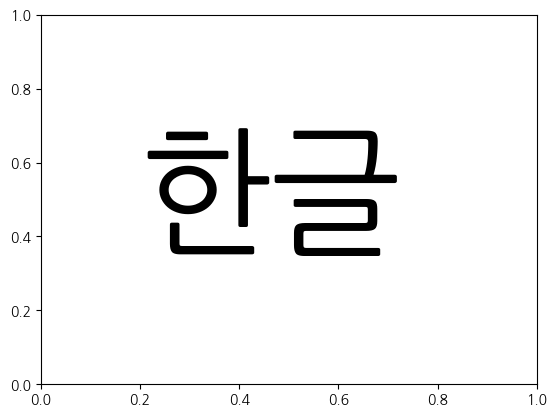

In [95]:
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [96]:
file_path = "./ref/시험_인천공항.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
155,인천공항,외국인,여자,2021,출국자,112458
156,인천공항,외국인,여자,2022,입국자,172332
157,인천공항,외국인,여자,2022,출국자,106797
158,인천공항,외국인,여자,2023,입국자,181388
159,인천공항,외국인,여자,2023,출국자,130769


In [97]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2004,입국자,105204
1,인천공항,내국인,남자,2004,출국자,134224
2,인천공항,내국인,남자,2005,입국자,115751
3,인천공항,내국인,남자,2005,출국자,149303
4,인천공항,내국인,남자,2006,입국자,131321
...,...,...,...,...,...,...
155,인천공항,외국인,여자,2021,출국자,112458
156,인천공항,외국인,여자,2022,입국자,172332
157,인천공항,외국인,여자,2022,출국자,106797
158,인천공항,외국인,여자,2023,입국자,181388


In [98]:
filter1 = ex1_data['type1']=='외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
80,인천공항,외국인,남자,2004,입국자,86848
81,인천공항,외국인,남자,2004,출국자,75996
82,인천공항,외국인,남자,2005,입국자,126932
83,인천공항,외국인,남자,2005,출국자,144938
84,인천공항,외국인,남자,2006,입국자,146542
...,...,...,...,...,...,...
155,인천공항,외국인,여자,2021,출국자,112458
156,인천공항,외국인,여자,2022,입국자,172332
157,인천공항,외국인,여자,2022,출국자,106797
158,인천공항,외국인,여자,2023,입국자,181388


In [99]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2004,769912
1,2005,991717
2,2006,996275
3,2007,1012415
4,2008,1080247


In [100]:
filter2 = ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2']=='출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

<Axes: title={'center': '2004~2023년 인천공항 입국 외국인 차트'}>

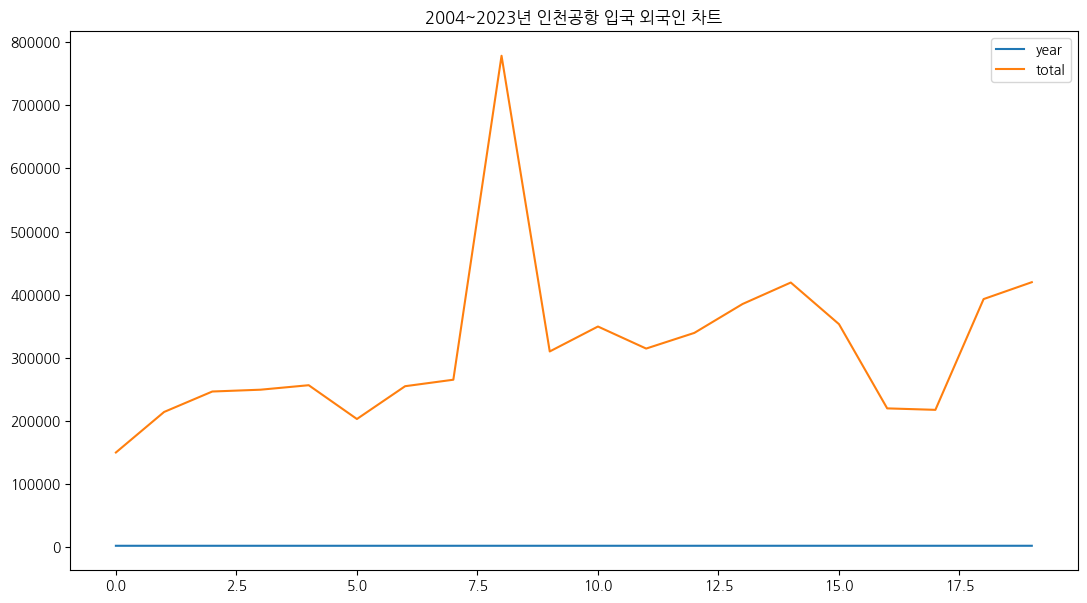

In [101]:
ex2_data.plot(figsize=(13,7),title="2004~2023년 인천공항 입국 외국인 차트")

<Axes: title={'center': '2004~2023년 인천공항 출국 외국인 차트'}>

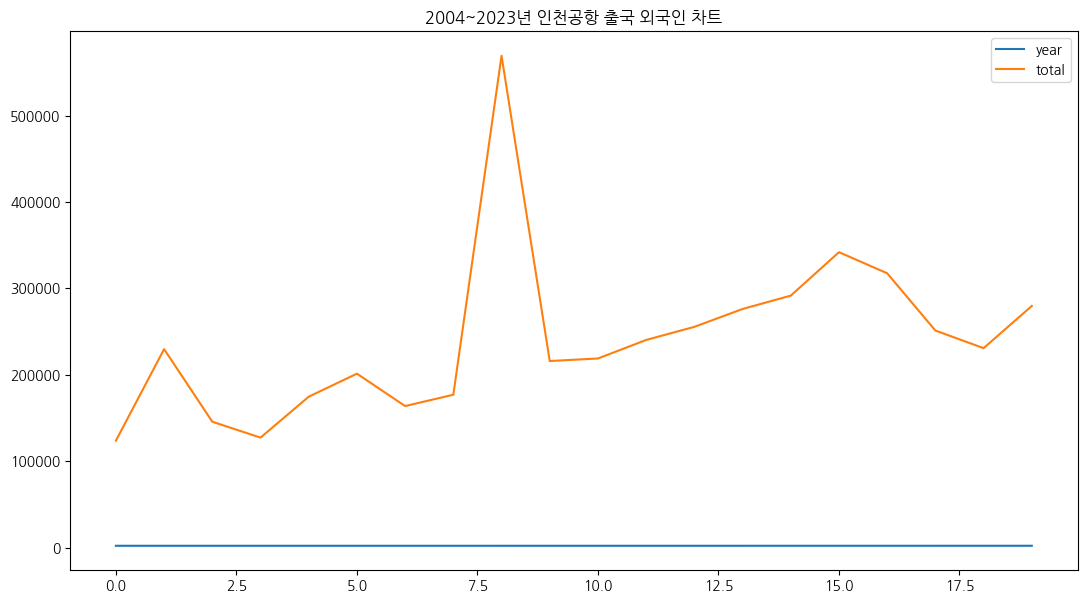

In [102]:
ex3_data.plot(figsize=(13,7),title="2004~2023년 인천공항 출국 외국인 차트")

In [103]:
from prophet import Prophet

In [104]:
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
15,2019-01-01,1198598
16,2020-01-01,1129092
17,2021-01-01,867277
18,2022-01-01,1073387
19,2023-01-01,1124211


In [105]:
m = Prophet()
m.fit(ex4_data)

15:02:57 - cmdstanpy - INFO - Chain [1] start processing
15:02:57 - cmdstanpy - INFO - Chain [1] done processing


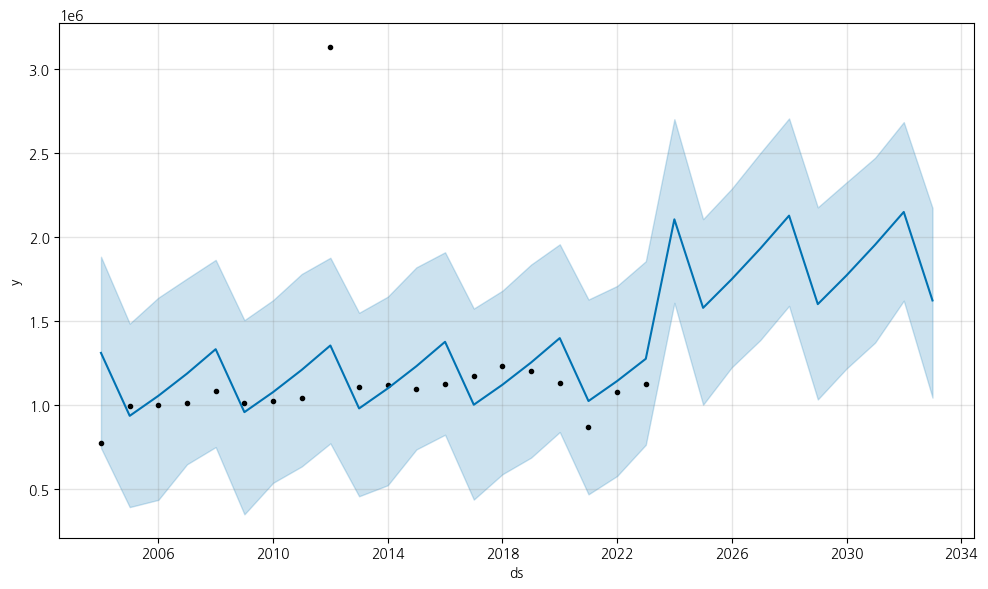

<Figure size 1000x1500 with 0 Axes>

In [106]:
future = m.make_future_dataframe(periods=10, freq='YE') 
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/예측11.png")
plt.figure(figsize=(10,15))
plt.show()

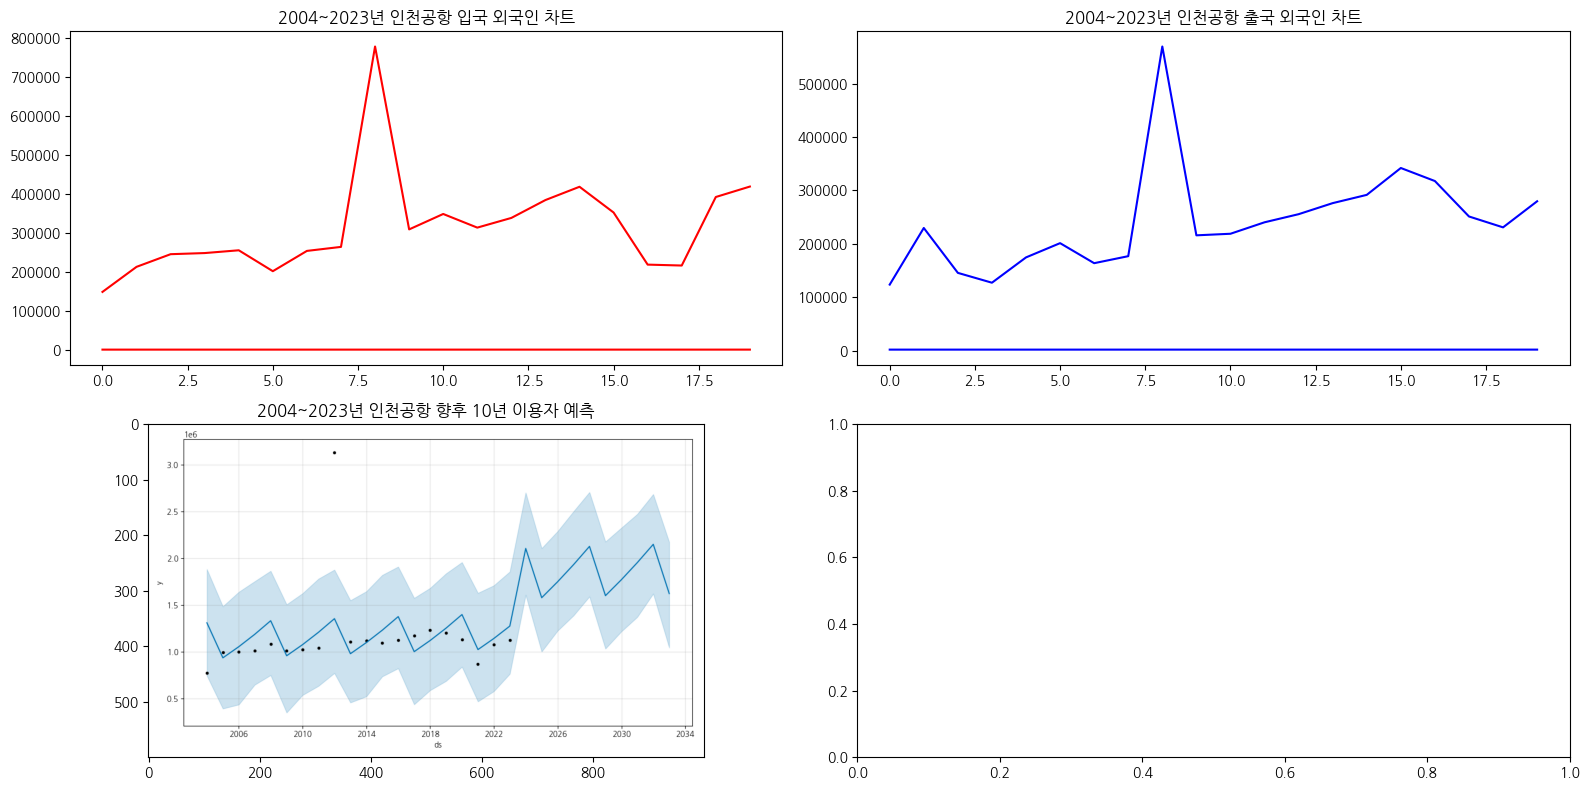

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("./chart/예측11.png")

fig , axs = plt.subplots(2,2,figsize=(16,8)) 

axs[0,0].plot(ex2_data,color="r")
axs[0,1].plot(ex3_data,color="b") 
axs[0,0].set_title("2004~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2004~2023년 인천공항 출국 외국인 차트")
axs[1,0].set_title("2004~2023년 인천공항 향후 10년 이용자 예측")

axins = fig.add_axes(axs[1,0])
axins.imshow(img)
plt.tight_layout()
plt.show()

## 인사이트, 시사점

- 코로나 전후 급격한 하락과 회복세 포착 가능
- 증가세일 경우, 한국의 위상이 높다고 의미할 수 있음
- 코로나 이후 급증하는 수요, 정체되는 시기, 계절성 패턴 등 파악 가능
- 이용률 증가 코로나 전후 급격한 하락과 회복세 포착 가능
- 증가세일 경우, 한국의 위상이 높다고 의미할 수 있음
- 코로나 이후 급증하는 수요, 정체되는 시기, 계절성 패턴 등 파악 가능
- 이용률 증가로 인해 공항 시설 확대 및 운영 최적화 필요성 증가